In [1]:
import pandas as pd
import numpy as np

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", context = "notebook")

In [2]:
data_path = "C:\juy\insurance.csv" 
df_mcpd = pd.read_csv(data_path)
df_mcpd.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df_mcpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df_mcpd.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df_mcpd.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df_mcpd.describe(include = "object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


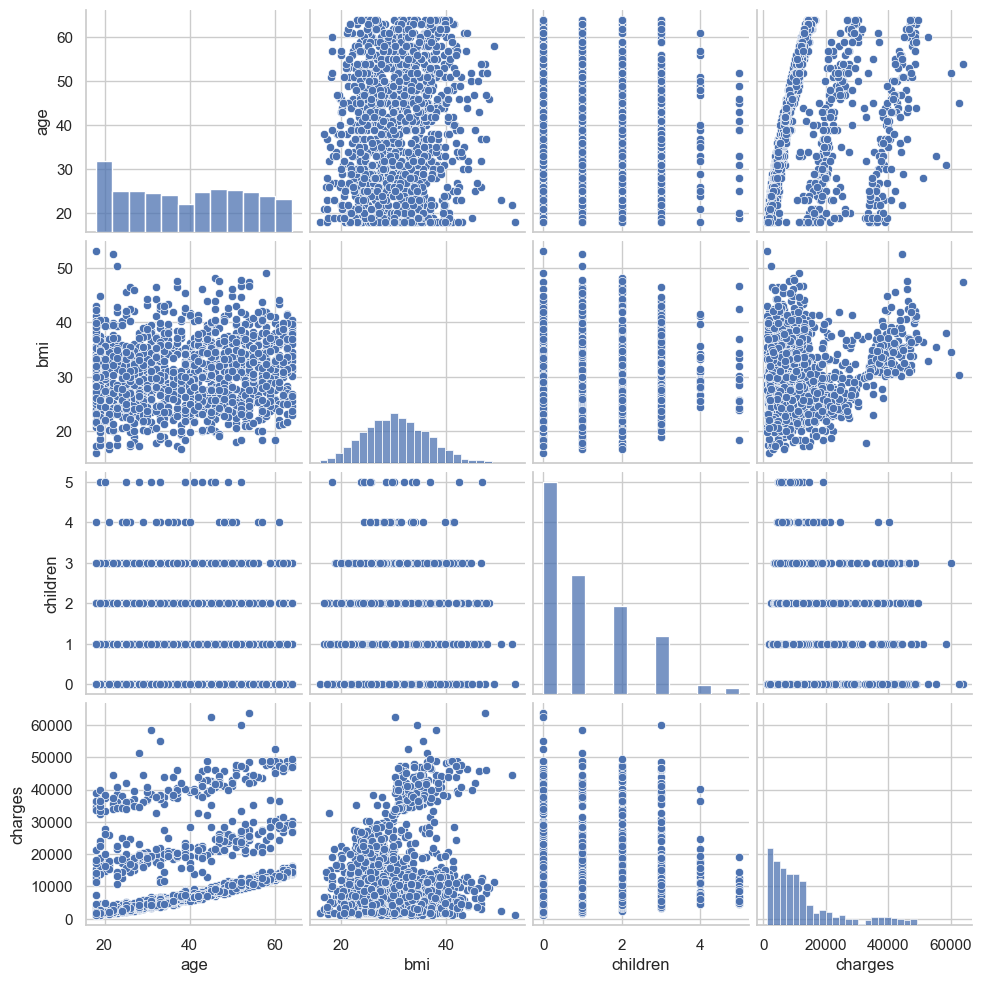

In [7]:
numeric_cols = ["age","bmi","children","charges"]
sns.pairplot(df_mcpd[numeric_cols], height = 2.5)
plt.plot()
plt.show()

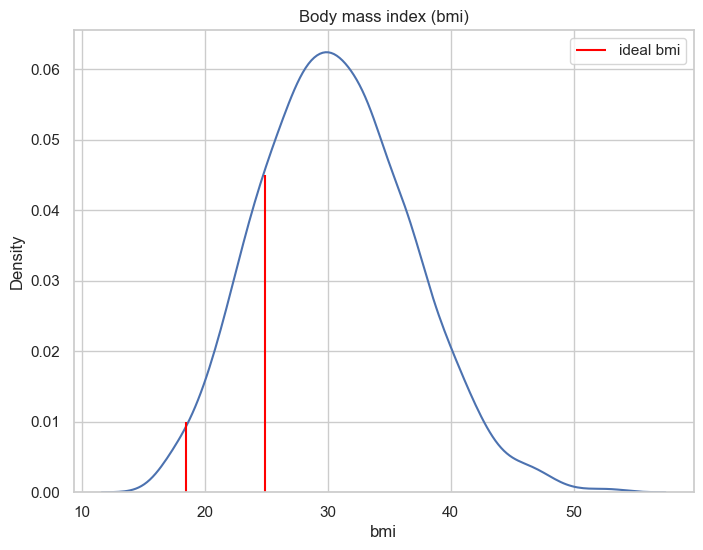

Percentage of people with the ideal bmi with respect to the sample : 16.59 %


In [8]:
li_ideally = 18.5
ls_ideally = 24.9

fig, ax = plt.subplots(figsize = (8,6))
sns.kdeplot(data = df_mcpd, x = "bmi", ax = ax)
ax.vlines(x = li_ideally, ymin = 0, ymax = 0.01, color = "red", label = "ideal bmi")
ax.vlines(x = ls_ideally, ymin = 0, ymax = 0.045, color = "red")
plt.title("Body mass index (bmi)")
plt.legend()
plt.show()
bmi_ideally_bool = (df_mcpd["bmi"] >= li_ideally) & (df_mcpd["bmi"] <= ls_ideally)
ideally_per = len(df_mcpd["bmi"][bmi_ideally_bool])/len(df_mcpd)
print("Percentage of people with the ideal bmi with respect to the sample : {0:0.2f} %".format(100*ideally_per))

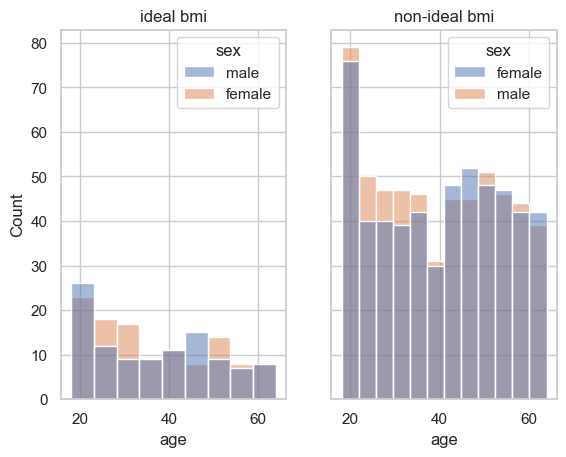

In [9]:
df_ages_bmiIdeal = df_mcpd[bmi_ideally_bool]
df_ages_no_bmiIdeal = df_mcpd[bmi_ideally_bool == False]

fig, ax = plt.subplots(1,2, sharey=True)
sns.histplot(data = df_ages_bmiIdeal, x = "age",  hue = "sex", ax = ax[0])
ax[0].set_title("ideal bmi")
sns.histplot(data = df_ages_no_bmiIdeal, x = "age", hue = "sex", ax = ax[1])
ax[1].set_title("non-ideal bmi")
plt.show()

In [10]:
# Lets create a new feature, it determines if a client is beetwen an ideal bmi.
df_mcpd["ideal_bmi"] = df_mcpd["bmi"].apply(lambda x:"yes" if (x >= li_ideally) and (x <= ls_ideally) else "no")
df_mcpd["ideal_bmi"].value_counts(normalize = True)

ideal_bmi
no     0.834081
yes    0.165919
Name: proportion, dtype: float64

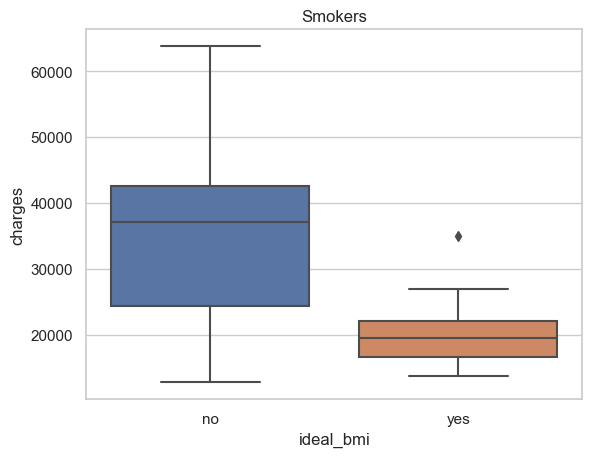

In [11]:
# Comparative of charges between ideal and non-ideal bmi of smokers
fig, ax = plt.subplots()
sns.boxplot(data = df_mcpd[df_mcpd["smoker"] == "yes"], x = "ideal_bmi", y ="charges")
plt.title("Smokers")
plt.show()

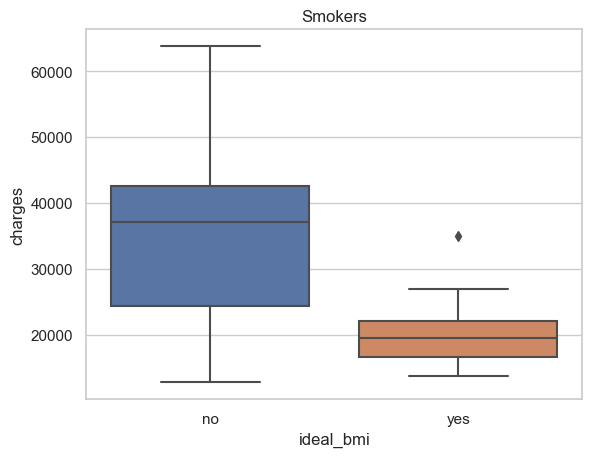

In [12]:
# Comparative of charges between ideal and non-ideal bmi of smokers
fig, ax = plt.subplots()
sns.boxplot(data = df_mcpd[df_mcpd["smoker"] == "yes"], x = "ideal_bmi", y ="charges")
plt.title("Smokers")
plt.show()

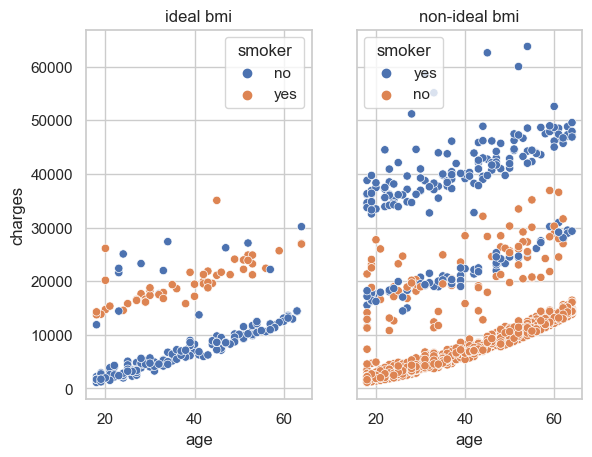

In [13]:
fig, ax = plt.subplots(1,2, sharey=True)
sns.scatterplot(data = df_ages_bmiIdeal, x = "age",  y = "charges", hue = "smoker", ax = ax[0])
ax[0].set_title("ideal bmi")
sns.scatterplot(data = df_ages_no_bmiIdeal, x = "age", y = "charges", hue = "smoker", ax = ax[1])
ax[1].set_title("non-ideal bmi")
plt.show()

In [14]:
# Lets create a new feature, it determines if a client is beetwen an ideal bmi.
df_mcpd["ideal_bmi"] = df_mcpd["bmi"].apply(lambda x:"yes" if (x >= li_ideally) and (x <= ls_ideally) else "no")
df_mcpd["ideal_bmi"].value_counts(normalize = True)

ideal_bmi
no     0.834081
yes    0.165919
Name: proportion, dtype: float64

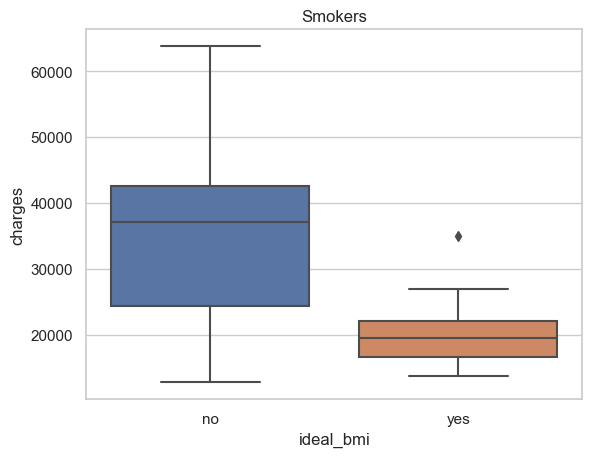

In [16]:
# Comparative of charges between ideal and non-ideal bmi of smokers
fig, ax = plt.subplots()
sns.boxplot(data = df_mcpd[df_mcpd["smoker"] == "yes"], x = "ideal_bmi", y ="charges")
plt.title("Smokers")
plt.show()

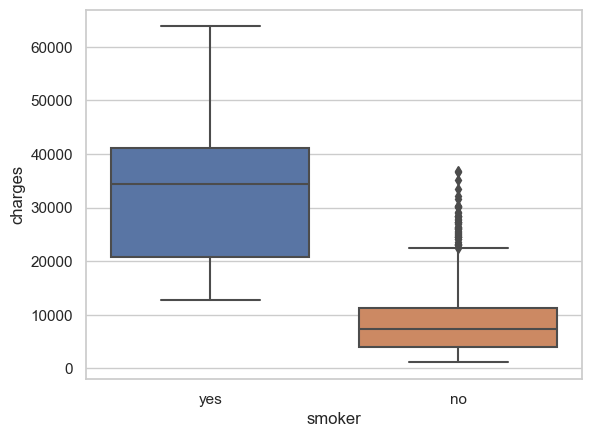

In [17]:
fig, ax = plt.subplots()
sns.boxplot(data = df_mcpd, x = "smoker", y ="charges")
plt.show()

<Axes: >

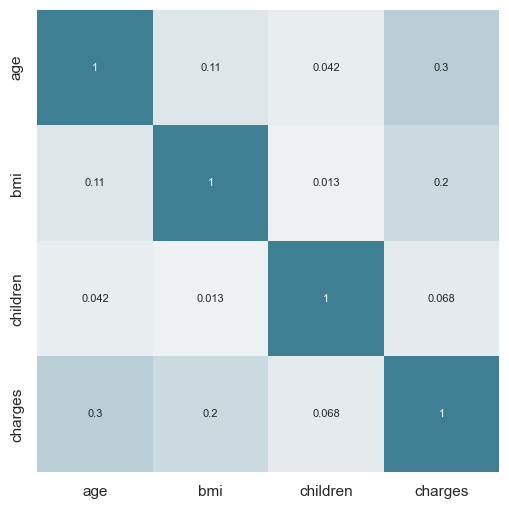

In [18]:
corr_matrix = df_mcpd.select_dtypes(["float64","int64"]).corr()

fig, ax = plt.subplots(figsize = (6,6))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

In [20]:
import seaborn as sns

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error 

In [23]:
X = df_mcpd[['age', 'bmi', 'children']]
y = df_mcpd['charges']

test_size = 0.2
random_state = 9384

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size   = test_size,
                                        random_state = random_state
                                        )

print("Train dataset size : {}".format(len(y_train)))
print("Test dataset size : {}".format(len(y_test)))

Train dataset size : 1070
Test dataset size : 268


In [24]:
X=df_mcpd['age']
y=df_mcpd['charges']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [25]:
X=df_mcpd['age']
y=df_mcpd['charges']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

import warnings
warnings.filterwarnings('ignore')

In [28]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    2707.051837
age       267.740141
dtype: float64

In [30]:
X_train = sm.add_constant(X_train, prepend=True)
lm = sm.OLS(endog=y_train, exog=X_train,)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     99.76
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           2.18e-22
Time:                        22:05:37   Log-Likelihood:                -10082.
No. Observations:                 936   AIC:                         2.017e+04
Df Residuals:                     934   BIC:                         2.018e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2707.0518   1113.327      2.431      0.0

In [31]:
intervals_lm = lm.conf_int(alpha=0.05)
intervals_lm.columns = ['2.5%', '97.5%']
intervals_lm

,2.5%,97.5%
const,522.138707,4891.964967
age,215.132523,320.347759


In [32]:
X_test = sm.add_constant(X_test, prepend=True)
y_pred = lm.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred ,
        squared = False
       )
print(f"rmse : {rmse}")

rmse : 11610.287596334485
